# Logistic Regression Model

## Imports 

In [1]:
#  data manipulation

import pandas as pd
import numpy as np

# data visualization

import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

#  data preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

#  data modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<ipython-input-1-58fb42a4baa3>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("tiktok_dataset.csv")

## EDA

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
data.shape

(19382, 12)

In [5]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [6]:
data.info

<bound method DataFrame.info of            # claim_status    video_id  video_duration_sec  \
0          1        claim  7017666017                  59   
1          2        claim  4014381136                  32   
2          3        claim  9859838091                  31   
3          4        claim  1866847991                  25   
4          5        claim  7105231098                  19   
...      ...          ...         ...                 ...   
19377  19378          NaN  7578226840                  21   
19378  19379          NaN  6079236179                  53   
19379  19380          NaN  2565539685                  10   
19380  19381          NaN  2969178540                  24   
19381  19382          NaN  8132759688                  13   

                                video_transcription_text verified_status  \
0      someone shared with me that drone deliveries a...    not verified   
1      someone shared with me that there are more mic...    not verified   
2      

In [7]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
data = data.dropna(axis=0)

In [10]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
data.duplicated().sum()

0

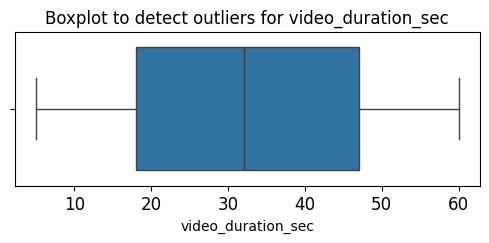

In [12]:
plt.figure(figsize=(6,2))
plt.title("Boxplot to detect outliers for video_duration_sec", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data["video_duration_sec"])
plt.show()

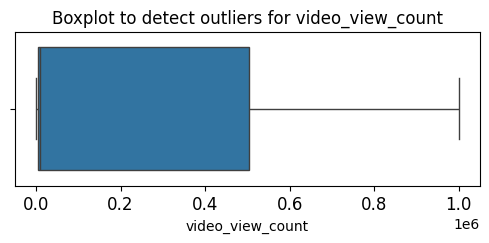

In [13]:
plt.figure(figsize=(6,2))
plt.title("Boxplot to detect outliers for video_view_count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data["video_view_count"])
plt.show()

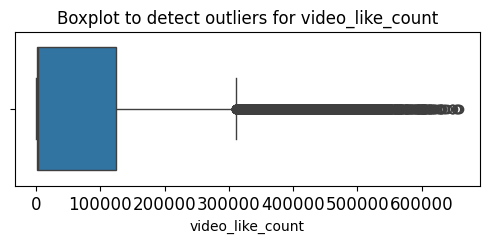

In [14]:
plt.figure(figsize=(6,2))
plt.title("Boxplot to detect outliers for video_like_count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data["video_like_count"])
plt.show()

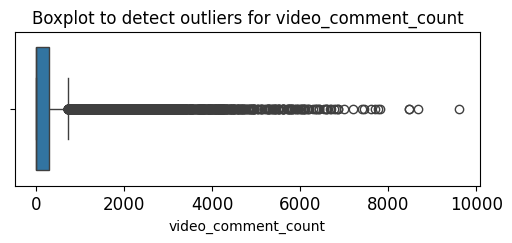

In [15]:
plt.figure(figsize=(6,2))
plt.title("Boxplot to detect outliers for video_comment_count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data["video_comment_count"])
plt.show()

In [17]:
percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [18]:
percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

In [19]:
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [20]:

data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]


data_minority_upsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=len(data_majority),
                                   random_state=0)


data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)


data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [21]:
data_upsampled[["verified_status","video_transcription_text"]].groupby("verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [22]:
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [23]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


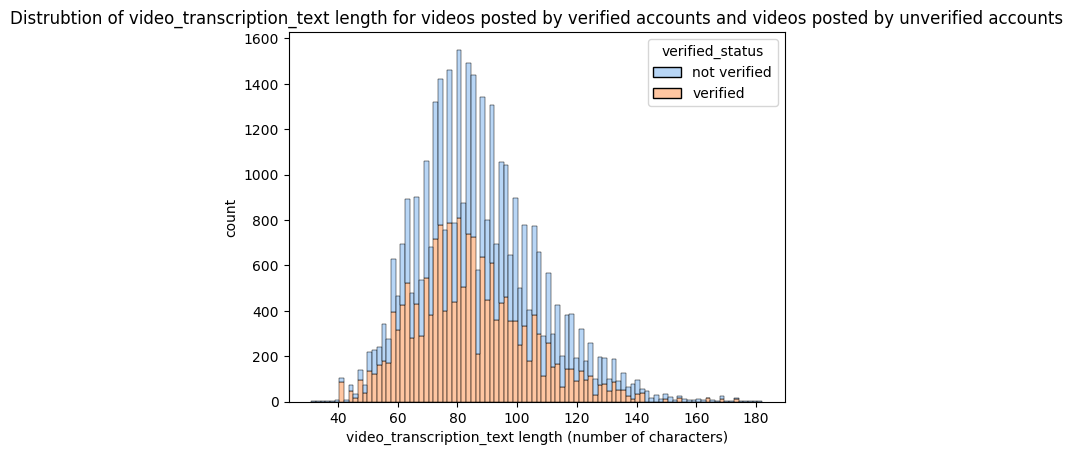

In [24]:
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel",
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn stacked histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("count")
plt.title("Distrubtion of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

In [25]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


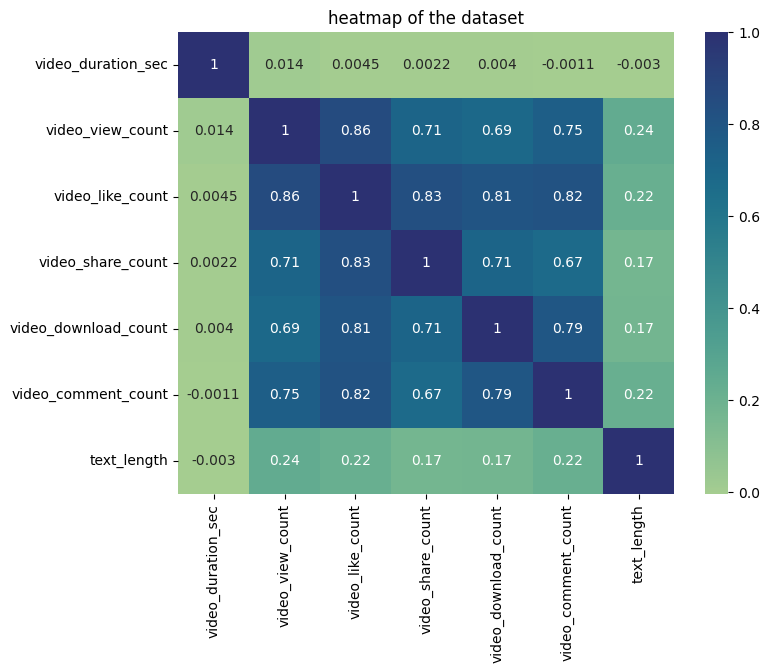

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count",
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True),
    annot=True,
    cmap="crest",)
plt.title("heatmap of the dataset")
plt.show()

## Model Building 

In [27]:
y = data_upsampled["verified_status"]

In [28]:
x = data_upsampled[["video_view_count", "video_duration_sec", "claim_status", "author_ban_status", "video_share_count", "video_download_count", "video_comment_count"]]


In [29]:
x.head()

,video_view_count,video_duration_sec,claim_status,author_ban_status,video_share_count,video_download_count,video_comment_count
0,343296.0,59,claim,under review,241.0,1.0,0.0
1,140877.0,32,claim,active,19034.0,1161.0,684.0
2,902185.0,31,claim,active,2858.0,833.0,329.0
3,437506.0,25,claim,active,34812.0,1234.0,584.0
4,56167.0,19,claim,active,4110.0,547.0,152.0


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [32]:
x_train.dtypes

video_view_count        float64
video_duration_sec        int64
claim_status             object
author_ban_status        object
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [33]:
x_train["claim_status"].unique()


array(['opinion', 'claim'], dtype=object)

In [34]:
x_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [35]:
x_train_to_encode = x_train[["claim_status","author_ban_status"]]


In [36]:
x_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [37]:
x_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [38]:
x_train_encoder = x_encoder.fit_transform(x_train_to_encode)

In [39]:
x_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [40]:
x_train_encoder

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [41]:
x_train_encoder_df = pd.DataFrame(data=x_train_encoder, columns=x_encoder.get_feature_names_out())


In [42]:
x_train_encoder_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [43]:
x_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_view_count,video_duration_sec,video_share_count,video_download_count,video_comment_count
33058,2252.0,33,23.0,4.0,0.0
20491,6664.0,52,550.0,53.0,2.0
25583,6327.0,37,257.0,3.0,0.0
18474,1702.0,57,28.0,0.0,0.0
27312,3842.0,21,101.0,1.0,0.0


In [44]:
x_train_final = pd.concat([x_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), x_train_encoder_df], axis=1)


In [45]:
x_train_final.head()

,video_view_count,video_duration_sec,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,2252.0,33,23.0,4.0,0.0,1.0,0.0,0.0
1,6664.0,52,550.0,53.0,2.0,1.0,0.0,0.0
2,6327.0,37,257.0,3.0,0.0,1.0,0.0,0.0
3,1702.0,57,28.0,0.0,0.0,1.0,0.0,0.0
4,3842.0,21,101.0,1.0,0.0,1.0,0.0,0.0


In [46]:
y_train.dtypes

dtype('O')

In [47]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [48]:
y_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [49]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()


In [50]:
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

In [51]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(x_train_final, y_train_final)

In [52]:
x_test_to_encode = x_test[["claim_status","author_ban_status"]]


In [53]:
x_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [54]:
x_test_encoded = x_encoder.transform(x_test_to_encode)


In [55]:
x_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [56]:
x_test_encoded_df = pd.DataFrame(data=x_test_encoded, columns=x_encoder.get_feature_names_out())
x_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [57]:
x_test.drop(columns=["claim_status","author_ban_status"]).head()

,video_view_count,video_duration_sec,video_share_count,video_download_count,video_comment_count
21061,2118.0,41,57.0,5.0,2.0
31748,5701.0,27,157.0,1.0,0.0
20197,449767.0,31,75385.0,5956.0,728.5
5727,792813.0,19,56597.0,5146.0,728.5
11607,2044.0,54,68.0,19.0,2.0


In [59]:
x_test_final = pd.concat([x_test.drop(columns=["claim_status","author_ban_status"]).reset_index(drop=True), x_test_encoded_df], axis=1)
x_test_final.head()

,video_view_count,video_duration_sec,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,2118.0,41,57.0,5.0,2.0,1.0,0.0,0.0
1,5701.0,27,157.0,1.0,0.0,1.0,0.0,0.0
2,449767.0,31,75385.0,5956.0,728.5,0.0,0.0,0.0
3,792813.0,19,56597.0,5146.0,728.5,0.0,0.0,0.0
4,2044.0,54,68.0,19.0,2.0,1.0,0.0,0.0


In [60]:
y_pred = log_clf.predict(x_test_final)

In [61]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [62]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

In [63]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()


In [64]:
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

In [65]:
x_train_final.shape,y_train_final.shape,x_test_final.shape,y_train_final.shape

((26826, 8), (26826,), (8942, 8), (26826,))

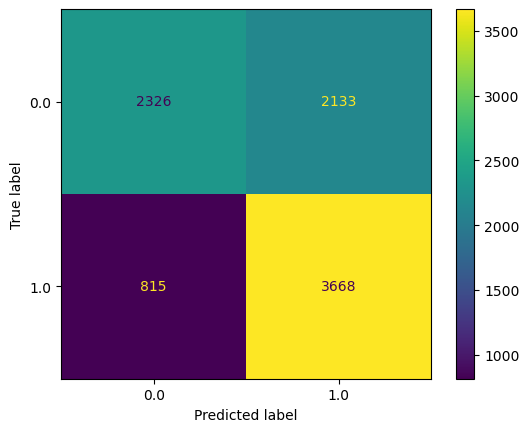

In [66]:

log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot()

plt.show()

In [67]:
(3758+2044) / (2044 + 2415 + 725 + 3758)

0.6488481324088571

In [68]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



In [69]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_,"model Coefficients":log_clf.coef_[0]})

,Feature Name,model Coefficients
0,video_view_count,-1.688672e-07
1,video_duration_sec,-2.453666e-03
2,video_share_count,4.826025e-06
3,video_download_count,-8.108600e-05
4,video_comment_count,4.483032e-04
5,claim_status_opinion,1.702588e+00
6,author_ban_status_banned,-4.484233e-01
7,author_ban_status_under review,-9.866558e-02
